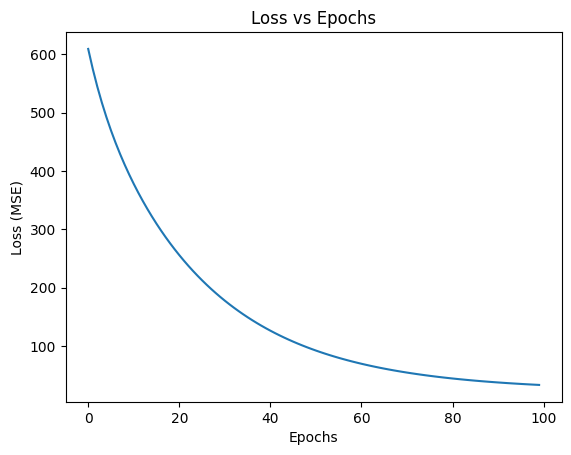

   Actual  Predicted
0    23.6  25.021727
1    32.4  30.654854
2    13.6  12.084311
3    22.8  21.570513
4    16.1  15.827176


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
weights = np.random.randn(n_features)
bias = 0
learning_rate = 0.01
epochs = 100

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

losses = []
for epoch in range(epochs):
    y_pred = X_train.dot(weights) + bias
    loss = compute_mse(y_train, y_pred)
    losses.append(loss)
    
    dL_dw = -2 * X_train.T.dot(y_train - y_pred) / len(y_train)
    dL_db = -2 * np.sum(y_train - y_pred) / len(y_train)
    
    weights -= learning_rate * dL_dw
    bias -= learning_rate * dL_db

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Epochs')
plt.show()

y_test_pred = X_test.dot(weights) + bias

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(comparison.head())